In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler , LabelEncoder 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\DATA SCIENCE\GITHUB REPO\Data\Social_Media_Engagement.csv")

In [3]:
df.head()

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
0,1,harrislisa,TikTok,54217,3,0.0986,538.10,0.0490,1308
1,2,rhicks,LinkedIn,987518,5,0.0834,479.24,0.0174,13302
2,3,qthomas,Facebook,218870,3,0.1020,150.36,0.0318,11043
3,4,carlosholt,Instagram,207432,6,0.0834,932.62,0.0400,12074
4,5,parsonsashley,Facebook,350204,2,0.0642,504.44,0.0463,14083


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account ID       10000 non-null  int64  
 1   Username         10000 non-null  object 
 2   Platform         10000 non-null  object 
 3   Follower Count   10000 non-null  int64  
 4   Posts Per Week   10000 non-null  int64  
 5   Engagement Rate  10000 non-null  float64
 6   Ad Spend (USD)   10000 non-null  float64
 7   Conversion Rate  10000 non-null  float64
 8   Campaign Reach   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [5]:
df.describe()

,Account ID,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,503941.555000,3.976900,0.086736,527.741840,0.029229,25308.848300
std,2886.89568,286028.799845,1.974274,0.013327,280.086676,0.011438,14119.006672
min,1.00000,1449.000000,1.000000,0.064200,51.950000,0.010100,1005.000000
25%,2500.75000,257061.750000,2.000000,0.083400,277.400000,0.019300,13187.000000
50%,5000.50000,506529.000000,4.000000,0.085600,517.560000,0.028400,25260.000000
75%,7500.25000,749949.250000,6.000000,0.098600,783.600000,0.039200,37524.000000
max,10000.00000,999982.000000,7.000000,0.102000,998.200000,0.050000,49998.000000


In [6]:
df.isnull().sum()

Account ID         0
Username           0
Platform           0
Follower Count     0
Posts Per Week     0
Engagement Rate    0
Ad Spend (USD)     0
Conversion Rate    0
Campaign Reach     0
dtype: int64

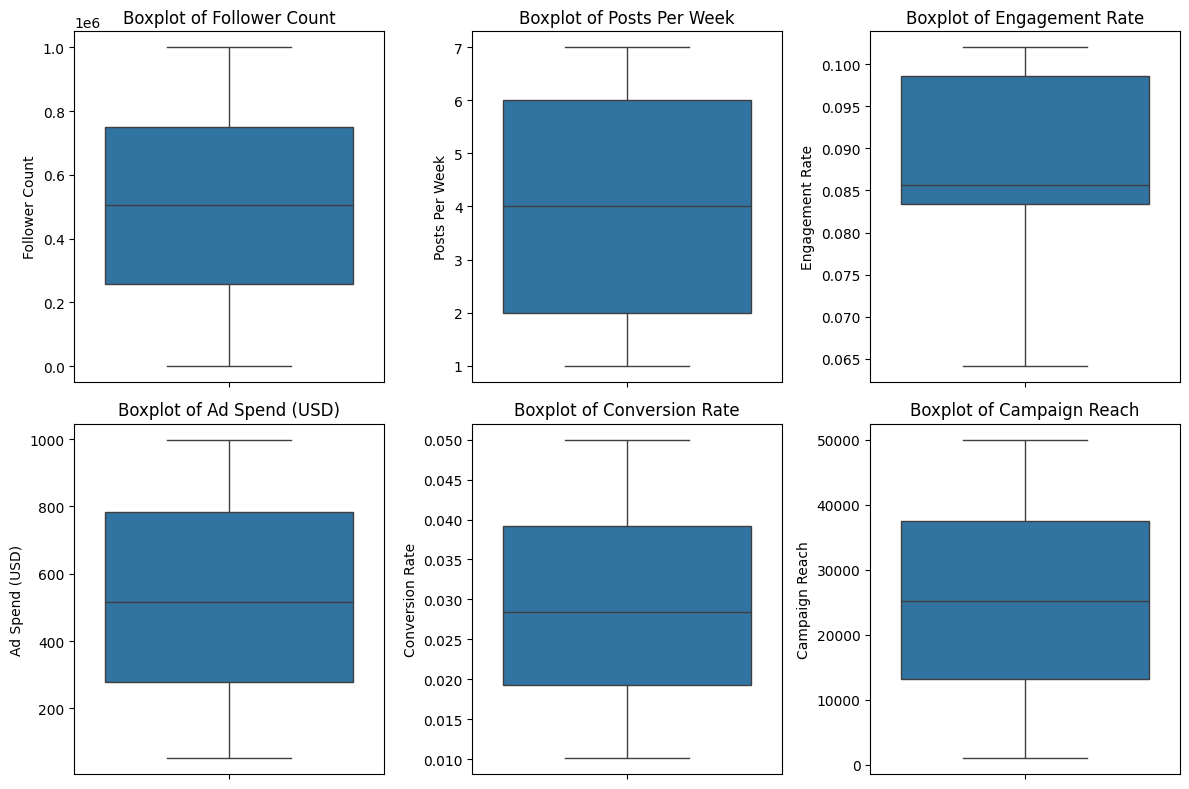

In [9]:
# List of numerical columns
num_col = ['Follower Count', 'Posts Per Week', 'Engagement Rate', 
           'Ad Spend (USD)', 'Conversion Rate', 'Campaign Reach']

# Set up the figure and subplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)  # Creating a 2-row, 3-column subplot layout
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()  # Adjusts spacing between subplots

plt.show()

In [12]:
df.sample(5)

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
3486,3487,elaine15,LinkedIn,543807,2,0.0856,184.93,0.0193,35918
5630,5631,rachelsnyder,TikTok,416897,3,0.0834,764.67,0.0427,18413
2602,2603,asimon,LinkedIn,957043,1,0.0856,640.55,0.0222,41479
2223,2224,uzhang,TikTok,858154,5,0.1020,147.17,0.0178,35449
5886,5887,gabriellashort,Instagram,805848,2,0.0642,321.35,0.0227,24902


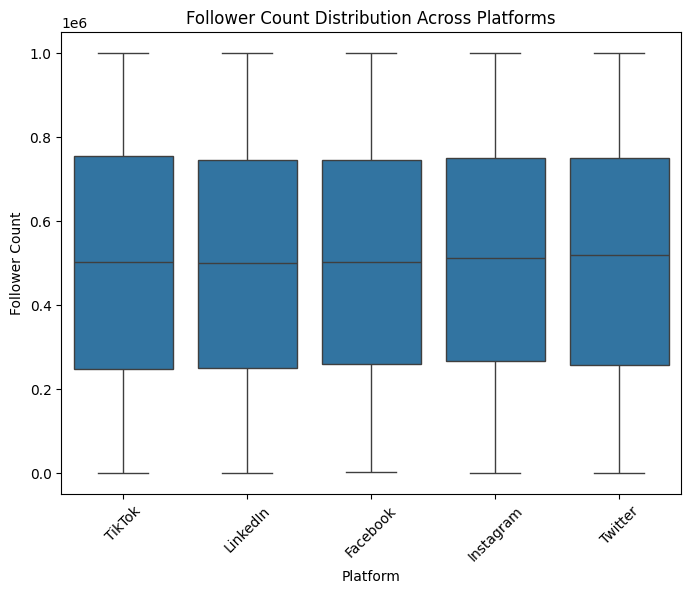

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Platform'], y=df['Follower Count'])
plt.title('Follower Count Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Follower Count')
plt.xticks(rotation=45)
plt.show()

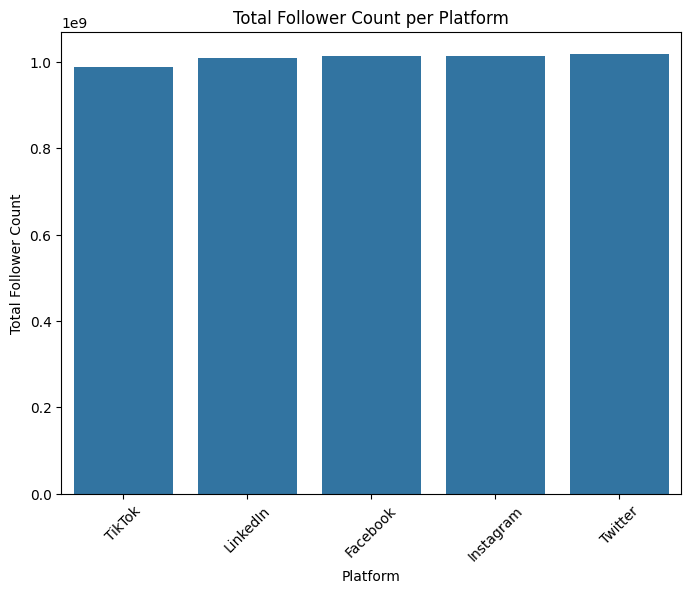

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Platform'], y=df['Follower Count'], estimator=sum, ci=None)  # Sum of followers per platform
plt.title('Total Follower Count per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Follower Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

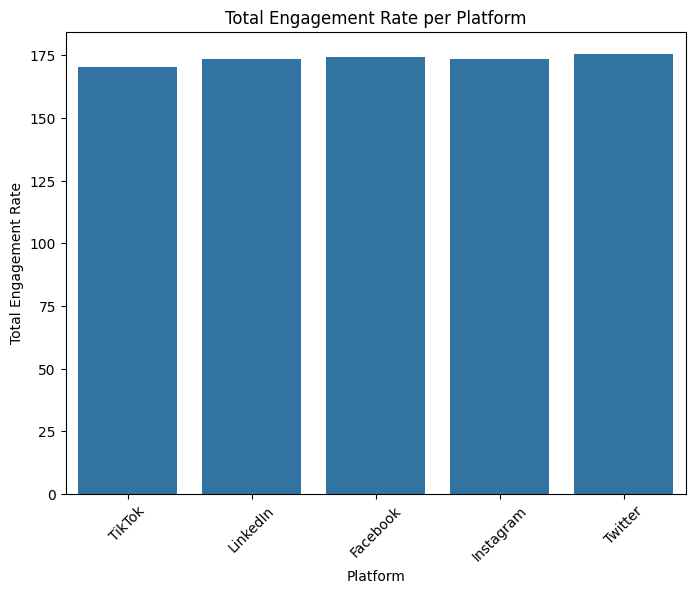

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Platform'], y=df['Engagement Rate'], estimator=sum, ci=None)  # Sum of Engagement Rate per Platform
plt.title('Total Engagement Rate per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Engagement Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

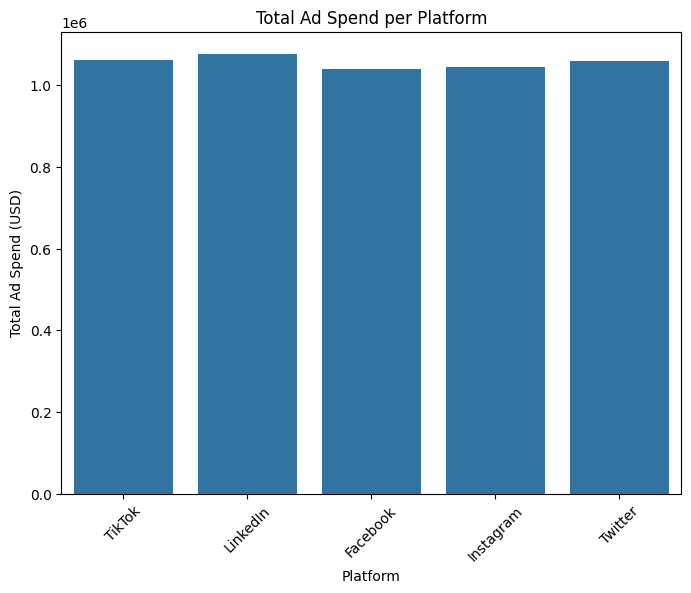

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Platform'], y=df['Ad Spend (USD)'], estimator=sum, ci=None)  # Total Ad Spend per Platform
plt.title('Total Ad Spend per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Ad Spend (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()